# IMDB Data Visualization

## Projeto da disciplina **SSC0252 - Visualização Computacional**

* Arthur Santorum Lorenzetto - arts.lorenzetto@usp.br - 12559465

* Lucas Ivars Cadima Ciziks - luciziks@usp.br - 125599472

* Gustavo Silva de Oliveira - guspfc03@usp.br - 12567231

---

# 1. Introdução

O conjunto de dados ***IMDB Movies*** é uma valiosa fonte de informações para pesquisadores do mundo cinematográfico. Composta por uma seleção dos 1000 filmes mais bem avaliados na plataforma IMDB, essa base oferece uma visão abrangente das tendências culturais. Cada filme na base possui atributos interessantes, como o título do filme, os gêneros a que pertencem, o *rating* no IMDB e seu ano de lançamento, proporcionando assim um conjunto de dados robusto que pode ser utilizado para análises de tendências audiovisuais, pesquisas culturais e até mesmo em sistemas de recomendações. A riqueza de informações contidas nessa base de dados a torna uma ferramenta indispensável para explorar e compreender a evolução do cinema ao longo das décadas.

---

# 2. Compreensão dos Dados

O projeto está armazenado no respositório disponível em [Github](https://github.com/ciziks/IMDB-data-visualization).

## 2.1. Coleta dos Dados

O conjunto de dados utilizado para a análise do projeto foi extraído da plataforma Kaggle, disponível em [IMDB Movies Dataset](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows). Os dados se referem às 1000 produções audiovisuais com maior nota no site [IMDB](https://www.imdb.com).

## 2.2. Dicionário de Dados

* **Series_Title**: Nome do Filme;

* **Released_Year** - Ano de lançamento do Filme;

* **Certificate** - Certificado do Filme;

* **Runtime** - Duração total do Filme;

* **Genre** - Gêneros do Filme;

* **IMDB_Rating** - Nota do Filme no site do IMDB (0 - 10);

* **Overview** - Sinopse do Filme;

* **Meta_score** - Nota do Filme no site do MetaCritic (0 - 100);

* **Director** - Nome do Diretor;

* **Star1, Star2, Star3, Star4** - Nome dos atores que estrelaram o Filme;

* **No_of_votes** - Número de votos do Filme;

* **Gross** - Arrecadação do Filme;

* **Poster_Link** - Link do poster do Filme no IMDB.

## 2.3. Tipo das Variáveis

* **Variáveis Qualitativas**
    * Ordinais
        * Released_Year;
        * Certificate.

    * Nominais:
        * Series_Title;
        * Genre;
        * Overview;
        * Director;
        * Star1, Star2, Star3, Star4.



* **Variáveis Quantitativas**:
    * Discretas:
        * Runtime;
        * Meta_score;
        * No_of_Votes.

    * Contínuas:
        * IMDB_Rating;
        * Gross.

## 2.4. Questionamentos Iniciais

* Como as características (duração, gênero, classificação indicativa, etc...) dos filmes no Top 1000 estão distribuídas?

* Como os filmes do Top 1000 estãos distríbuidos no decorrer dos anos?

* Quais diretores estão associados aos maiores *ratings*?

* Que diretores mais arrecadaram com seus filmes?

* Existe uma correlação da duração do filme com sua arrecadação?

* Como o *rating* do filme está correlacionado com sua arrecadação (*gross*)?

* Quais as palavras mais comuns nas sinopses dos filmes?

* Existe uma correlação entre a nota no IMDB e o MetaScore?

* Qual nota explica melhor a arrecadação do filme: IMDB ou MetaCritic?

* Qual combinação de atores apresentam os melhores resultados de bilheteria?

---

# 3. Tratamento dos Dados

In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import locale

In [2]:
# Coletando Base de Dados
df = pd.read_csv("./imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# Visualizando colunas
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [4]:
# Verificando Tipos das Colunas
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [5]:
# Removendo coluna do Poster (Desinteressante à Análise)
df.drop(columns=['Poster_Link'], inplace = True)

In [6]:
# Transformando Gross em um valor numérico
def gross_to_numeric(gross):
    if isinstance(gross, str):
        return float("".join(re.findall(r"\d", gross)))
    return gross

df["Gross"] = df["Gross"].apply(gross_to_numeric)

In [7]:
# 286 Filmes com valores nulos
len(df[df.isna().any(axis=1)])

286

In [8]:
# As Colunas onde há valores NaN são: Certificate, Meta_score, Gross
df[df.columns[df.isna().any()]]

,Certificate,Meta_score,Gross
0,A,80.0,28341469.0
1,A,100.0,134966411.0
2,UA,84.0,534858444.0
3,A,90.0,57300000.0
4,U,96.0,4360000.0
...,...,...,...
995,A,76.0,NaN
996,G,84.0,NaN
997,Passed,85.0,30500000.0
998,NaN,78.0,NaN


In [9]:
# Inputação dos valores médios?
df[['IMDB_Rating','Meta_score','Gross']].describe()

,IMDB_Rating,Meta_score,Gross
count,1000.000000,843.000000,8.310000e+02
mean,7.949300,77.971530,6.803475e+07
std,0.275491,12.376099,1.097500e+08
min,7.600000,28.000000,1.305000e+03
25%,7.700000,70.000000,3.253559e+06
50%,7.900000,79.000000,2.353089e+07
75%,8.100000,87.000000,8.075089e+07
max,9.300000,100.000000,9.366622e+08


In [10]:
# Dropando valores NaN
df.dropna(inplace=True)

---

# 4. Análise Exploratória dos Dados

## 4.1. Análise Univariada

**Classificação Indicativa dos Filmes**: Para verificar a proporção de cada classificação indicativa no Top 1000 filmes do IMDB, utilizaremos um **Gráfico de Pizza**, pois se trata de uma variável categórica nominal.

Como é possível observar, há 4 categorias superiores às outras: 
* **A** - *Adults*: Apenas adultos (+18)
* **UA**: Livre, porém crianças de 12 anos devem estar acompanhadas
* **U** - *Unrestricted*: Classificação Livre
* **R** - *Restricted*: Adolescentes (+16) acompanhados

In [11]:
fig = px.pie(values=df["Certificate"].value_counts(), 
             names=df["Certificate"].unique(), 
             title='Classificação Indicativa dos Filmes no Top 1000 do IMDB').update_traces(pull=0.02)
fig.show()

**Gênero dos Filmes**: Para analisar quais gêneros são predominantes no Top 1000 filmes do IMDB, utilizaremos um **Gráfico de Pizza**, pois se trata de uma variável categórica nominal.

Com base no gráfico, é visível que o gênero Drama se destaca, caracterizando quase 30% dos filmes. Junto do Drama, os gêneros Crime, Ação e Aventura correspondem à metade dos filmes, enquanto os outros 50% estão distribuídos entre 17 categorias menos relevantes.

In [12]:
# Distribuição dos Gênero dos Filmes no Top 1000
df_aux = df.copy()
df_aux['Genre'] = df_aux['Genre'].str.split(', ')
df_aux = df_aux.explode('Genre')

fig = px.pie(values=df_aux["Genre"].value_counts(), 
             names=df_aux["Genre"].unique(), 
             title='Gênero dos Filmes no Top 1000 do IMDB').update_traces(pull=0.02)
fig.show()

**Distribuição ao longo dos Anos**: Para analisar a quantidade de filmes no Top 1000 do IMDB em cada ano, utilizaremos um **Gráfico de Barras** por se tratar de uma variável categórica ordinal.

É possível notar que os filmes do Top 1000 estão concentrados na década de 40 com um comportamento decrescente, ou seja, os filmes mais aclamados tendem a ser mais antigos.

In [13]:
fig = px.bar(
    x=sorted(df["Released_Year"].unique()),
    y=[df["Released_Year"].value_counts()],
    title="Top 1000 Filmes IMDB distribuídos ao longo dos Anos",
    labels={"x": "Ano de Lançamento"},
).update_layout(showlegend=False, yaxis_title="Quantidade de Filmes").update_xaxes(type='category')
fig.show()

**Distribuição do IMDB Rating**: Para analisar como o IMDB Rating está distribuído entre os filmes, aplicaremos um **Histograma** junto de um **Boxplot**, pois ambos os gráficos auxiliam no entendimento da distribuição em variáveis númericas.

Com base nos gráficos, é possível notar que os filmes estão concentrados entre os ratings 7.7 e 8.1, com alguns outliers acima de 9.


In [14]:
# Distribuição do IMDB Rating
fig = px.histogram(
    x=df.IMDB_Rating, 
    title="Distribuição do IMDB Rating nos Filmes",
    marginal="box",
    labels={"x": "Nota no IMDB"}
    ).update_traces(marker_color="Tomato").update_layout(yaxis_title="Quantidade de Filmes")
fig.show()

**Distribuição do MetaScore**: Para analisar como o MetaScore está distribuído entre os filmes, aplicaremos um **Histograma** junto de um **Boxplot**, pois ambos os gráficos auxiliam no entendimento da distribuição em variáveis númericas.

Analisando os gráficos, é visível que a maior parte dos filmes possui uma nota no MetaCritic entre 70 e 86, com alguns outliers mal avaliados com nota inferior a 40.


In [15]:
# Distribuição do MetaCritic Score
fig = px.histogram(
    x=df.Meta_score, 
    title="Distribuição do MetaScore nos Filmes",
    marginal="box",
    labels={"x": "Nota no MetaCritic"}
    ).update_traces(marker_color="DarkSlateGray").update_layout(yaxis_title="Quantidade de Filmes")
fig.show()

**Distribuição do Número de Votos no IMDB**: Para verificar a popularidade do filme, é possível analisar seu número de votos no IMDB, ou seja, a quantidade de pessoas que assistiram e avaliaram a obra. Para isso, também utilizaremos um **Histograma** junto de um **Boxplot**, pois ambos os gráficos auxiliam no entendimento da distribuição em variáveis númericas.

Analisando os gráficos, é possível notar que a maior parte dos filmes possui de 55K até 375K de votos, enquanto há vários outliers com número de votos acima de 1 milhão.


In [16]:
fig = px.histogram(
    x=df.No_of_Votes, 
    title="Distribuição do Número de Votos nos Filmes",
    marginal="box",
    labels={"x": "Número de votos no IMDB"}
    ).update_traces(marker_color="DarkSlateGray").update_layout(yaxis_title="Quantidade de Filmes")
fig.show()

**Distribuição da Arrecadação**: Para analisar quanto os filmes do Top 1000 arrecadaram, aplicaremos um **Histograma** junto de um **Boxplot**, pois ambos os gráficos auxiliam no entendimento da distribuição em variáveis númericas.

Pelos gráficos, é possível notar que mais de 25% dos filmes arrecadaram menos de 20 milhões de dólares e 75% arrecadaram menos de 105 milhões. Enquanto isso, há alguns outliers que conseguiram arrecadar mais de meio bilhão de dólares. É interessante observar que a distribuição do histograma é muito similar ao gráfico do número de votos no IMDB. Isso traz uma evidência inicial de que o número de interações com o filme influencia mais em sua arrecadação do que as notas do IMDB.


In [17]:
# Distribuição da Arrecadação dos Filmes
fig = px.histogram(
    x=df.Gross, 
    title="Distribuição da Arrecadação dos Filmes",
    marginal="box",
    labels={"x": "Arrecadação do Filme em Dólares"}
    ).update_traces(marker_color="DarkOliveGreen").update_layout(yaxis_title="Quantidade de Filmes")
fig.show()

## 4.2. Análise Bivariada

**Média de arrecadação dos 15 diretores mais recorrentes no Top 1000**: Para
a visualização, escolheu-se um gráfico de barras para comparar visualmente as médias de arrecadação dos diferentes diretores mais recorrentes.

Pelo gráfico, nota-se que os diretores mais recorrentes no Top 1000, não necessariamente são aqueles com mais arrecadações. Muitos motivos podem explicar isso, entre eles, a época dos filmes.


/Users/ciziks/Documentos/USP/Semestre 6/Visualização Computacional/IMDB-data-visualization/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ciziks/Documentos/USP/Semestre 6/Visualização Computacional/IMDB-data-visualization/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ciziks/Documentos/USP/Semestre 6/Visualização Computacional/IMDB-data-visualization/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



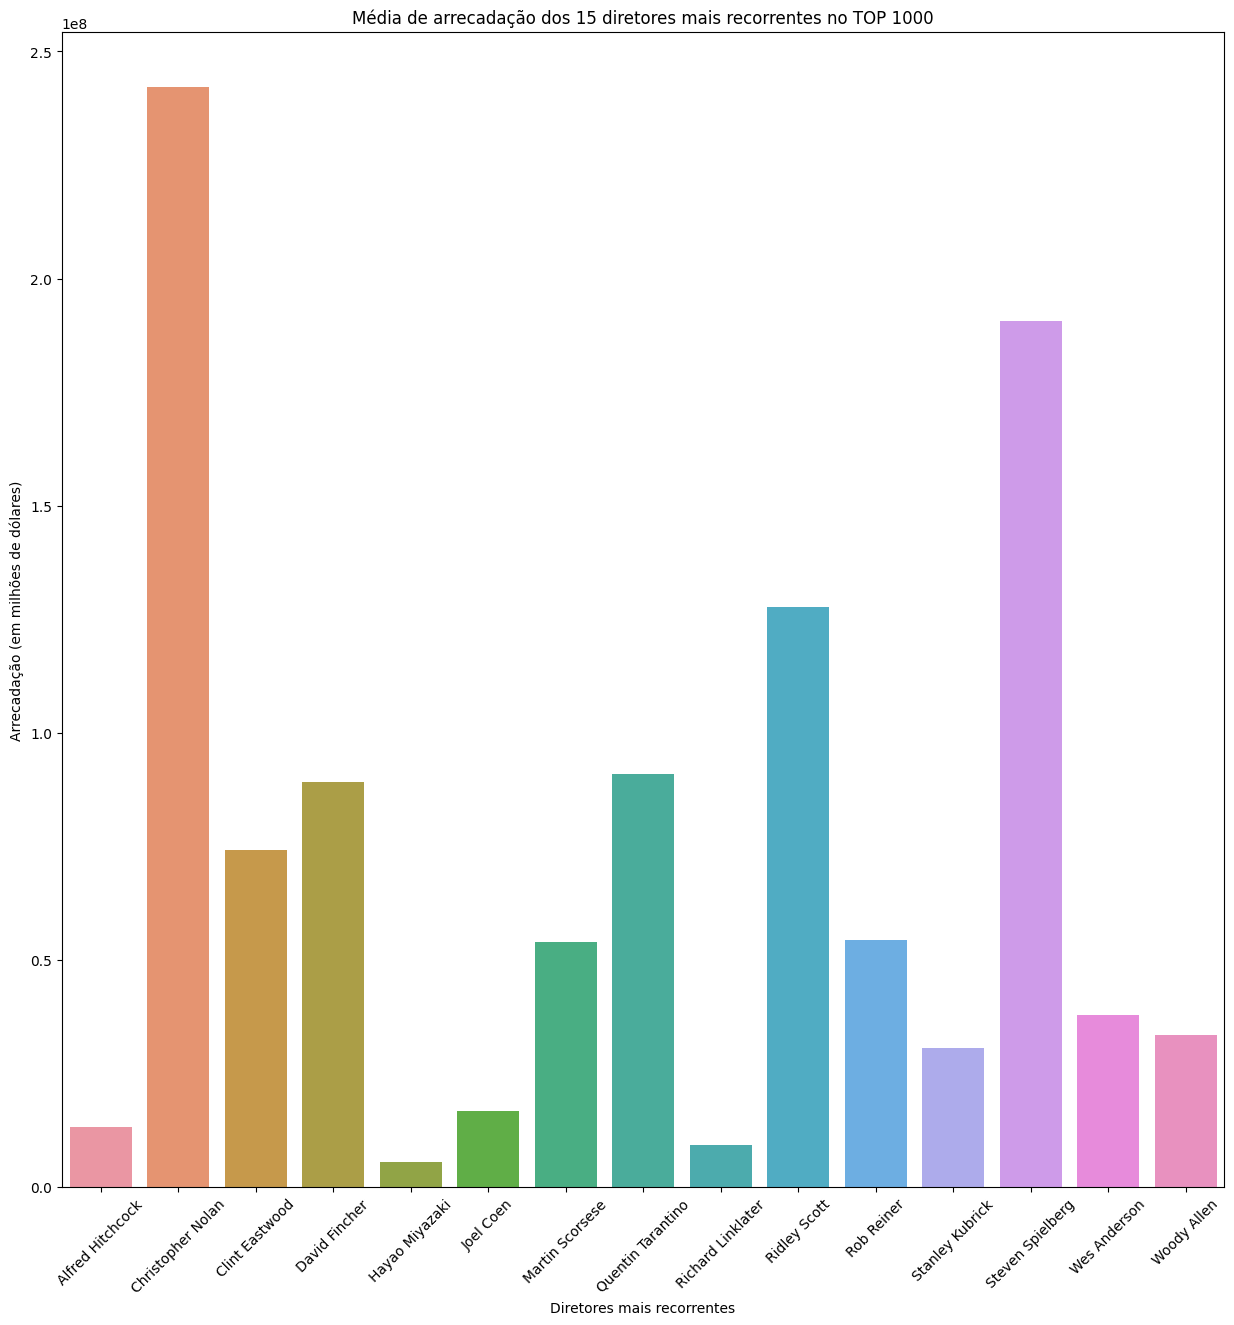

In [20]:
diretores_mais_presentes = df.Director.value_counts().head(15).index

df_diretores_mais_presentes = df[df['Director'].isin(diretores_mais_presentes)]
df_diretores_mais_presentes_media = df_diretores_mais_presentes[['Director','Gross']].groupby('Director').mean().reset_index()

plt.figure(figsize=(15, 15))

plt.xticks(rotation=45)


fig = sns.barplot(data=df_diretores_mais_presentes_media, x="Director", y="Gross")


plt.xlabel("Diretores mais recorrentes")
plt.ylabel("Arrecadação (em milhões de dólares)")
plt.title("Média de arrecadação dos 15 diretores mais recorrentes no TOP 1000")

plt.show()
# fig.set(xlabel ="Diretores mais recorrentes", ylabel = "Arrecadação (em milhões de dólares)",
#         title ='Arrecadação dos 15 diretores mais recorrentes no TOP 1000')


**Comparação das médias de arrecadação dos diretores mais recorrentes vs. diretores menos recorrentes no Top 1000**

In [ ]:
media_mais = df_diretores_mais_presentes.Gross.mean()

df_diretores_menos_presentes = df[ ~(df['Director'].isin(diretores_mais_presentes))]
media_menos = df_diretores_menos_presentes.Gross.mean()

locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')

print(f'Média diretores menos recorrentes {locale.currency(media_menos, grouping=True)}')
print(f'Média diretores mais recorrentes {locale.currency(media_mais, grouping=True)}')

Média diretores menos recorrentes $78,405,553.90
Média diretores mais recorrentes $79,076,287.58


**Média das notas no IMDB dos 15 diretores mais recorrentes no Top 1000**: Para
a visualização, escolheu-se um gráfico de barras para comparar visualmente as médias das notas dos diferentes diretores mais recorrentes.

Pelo gráfico, nota-se que os diretores mais recorrentes no Top 1000, possuem notas altas, não havendo diferenças significativas entre os diretores.


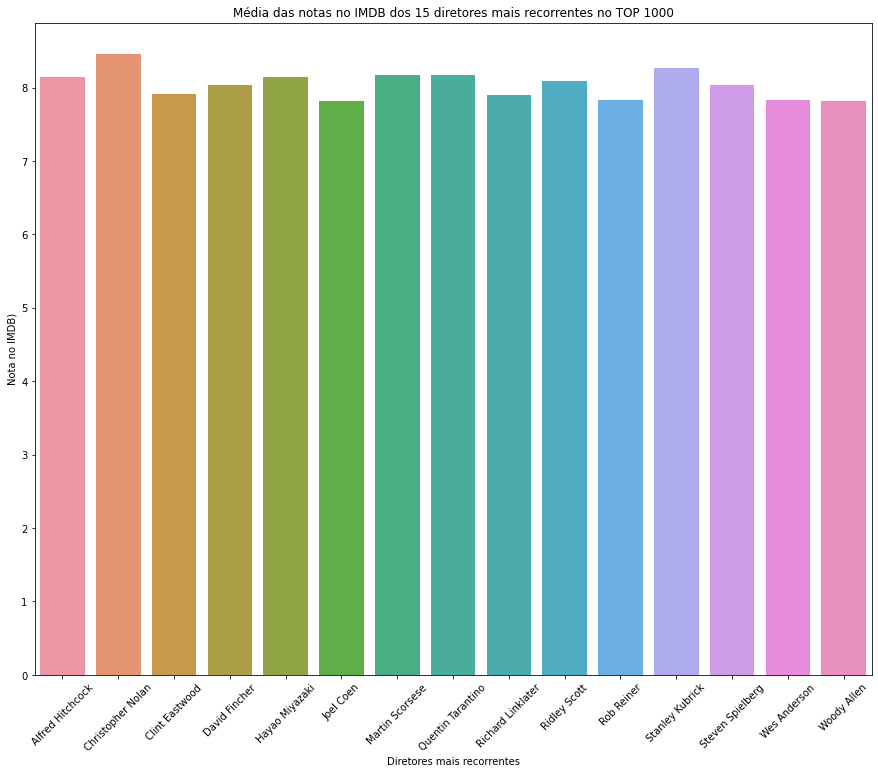

In [ ]:
plt.figure(figsize=(15, 12))

plt.xticks(rotation=45)

fig = sns.barplot(data=df_diretores_mais_presentes_media, x="Director", y="IMDB_Rating")

plt.xlabel("Diretores mais recorrentes")
plt.ylabel("Nota no IMDB)")
plt.title("Média das notas no IMDB dos 15 diretores mais recorrentes no TOP 1000")

plt.show()

**Comparação das médias de notas dos diretores mais recorrentes vs. diretores menos recorrentes no Top 1000**

In [ ]:
media_mais = df_diretores_mais_presentes.IMDB_Rating.mean()

df_diretores_menos_presentes = df[ ~(df['IMDB_Rating'].isin(diretores_mais_presentes))]
media_menos = df_diretores_menos_presentes.IMDB_Rating.mean()

print(f'Média nota dos diretores menos recorrentes {round(media_menos, 2)}')
print(f'Média nota dos diretores mais recorrentes {round(media_mais, 2)}')

Média nota dos diretores menos recorrentes 7.94
Média nota dos diretores mais recorrentes 8.05


**Média das arrecadações através dos anos de lançamento**: Para
a visualização, escolheu-se um gráfico de linhas para comparar visualmente as médias das arrecadações ao longo do tempo.

Pelo gráfico, nota-se que há uma tendência de aumento das arrecadações ao longo do tempo.


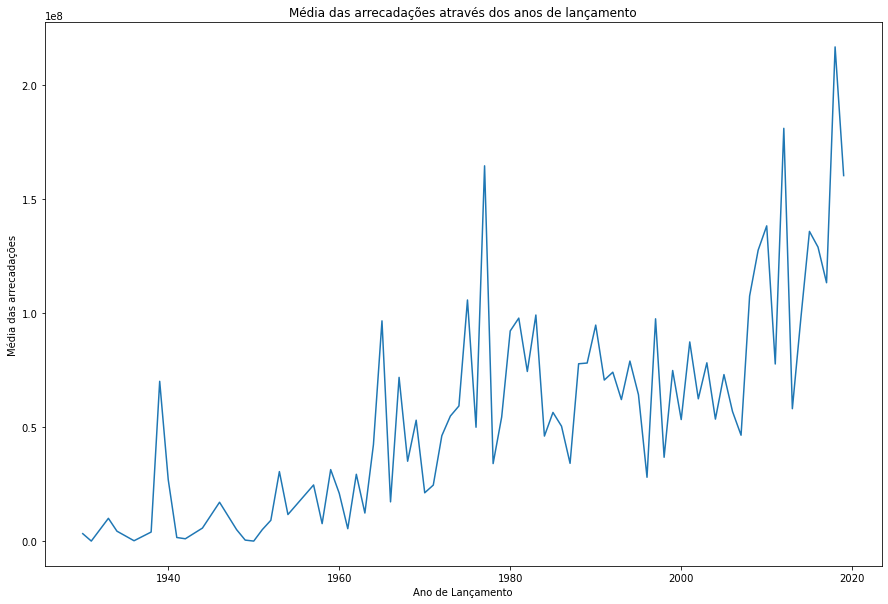

In [ ]:
df_years = df.groupby('Released_Year').mean().reset_index()

plt.figure(figsize=(15, 10))

plt.xlabel("Ano de Lançamento")
plt.ylabel("Média das arrecadações")
plt.title("Média das arrecadações através dos anos de lançamento")

sns.lineplot(data=df_years, x="Released_Year", y="Gross")

plt.show()

## 4.3. Análise Multivariada

**Correlação entre as variáveis**: Para a visualização, escolheu-se um mapa de calor para comparar visualmente as correlações.

Pelo gráfico, percebe-se as diferentes correlações entre as variáveis. Destacando-se, IMDB_Rating e No_of_Votes com forte correlação.


Text(0.5, 1.0, 'Correlações entre atributo')

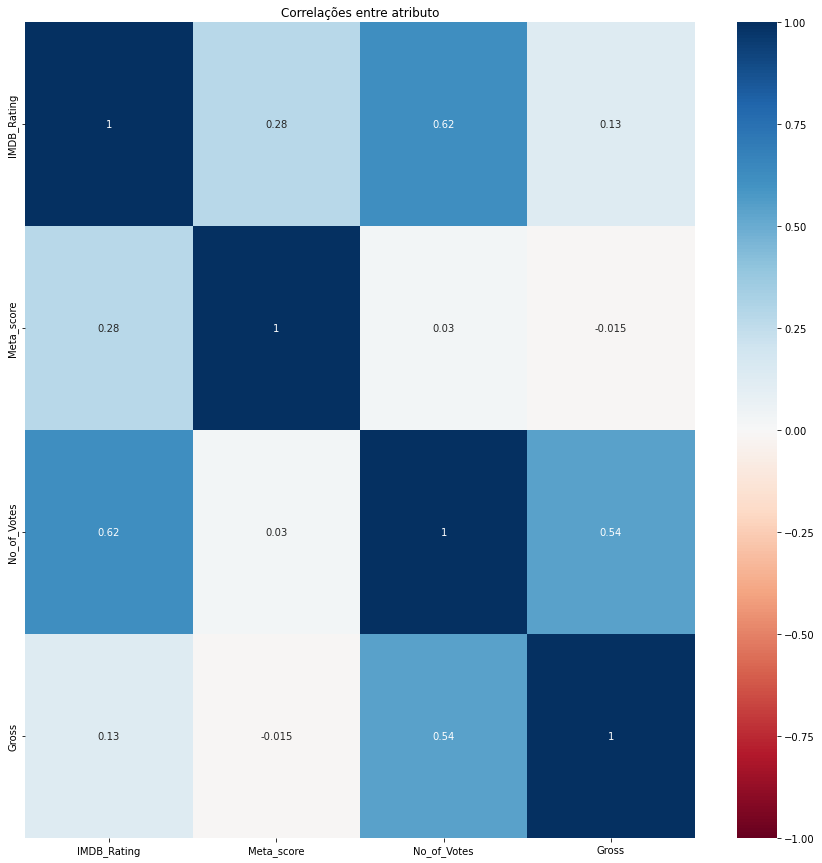

In [ ]:
# Mapa de calor das correlações
df_variaveis_numericas = df.select_dtypes(include='number')
df_variaveis_numericas.drop(columns = "Released_Year", inplace = True)
correlations = df_variaveis_numericas.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlations, annot=True, cmap='RdBu', vmin=-1.0, vmax=1.0)
plt.title('Correlações entre atributo')

**Correlação entre as variáveis**: Para
a visualização, escolheu-se uma matriz de gráficos de dispersão, em que cada célula da matriz mostra a relação entre duas variáveis com uma linha de regressão linear nos gráficos de dispersão. E os gráficos diagonais exibem histogramas.

Pelo gráfico, percebe-se as diferentes correlações entre as variáveis. Destacando-se, a ausência de uma tendência explícita e clara, parecendo ser distribuições ruidosas.


<Figure size 1080x1080 with 0 Axes>

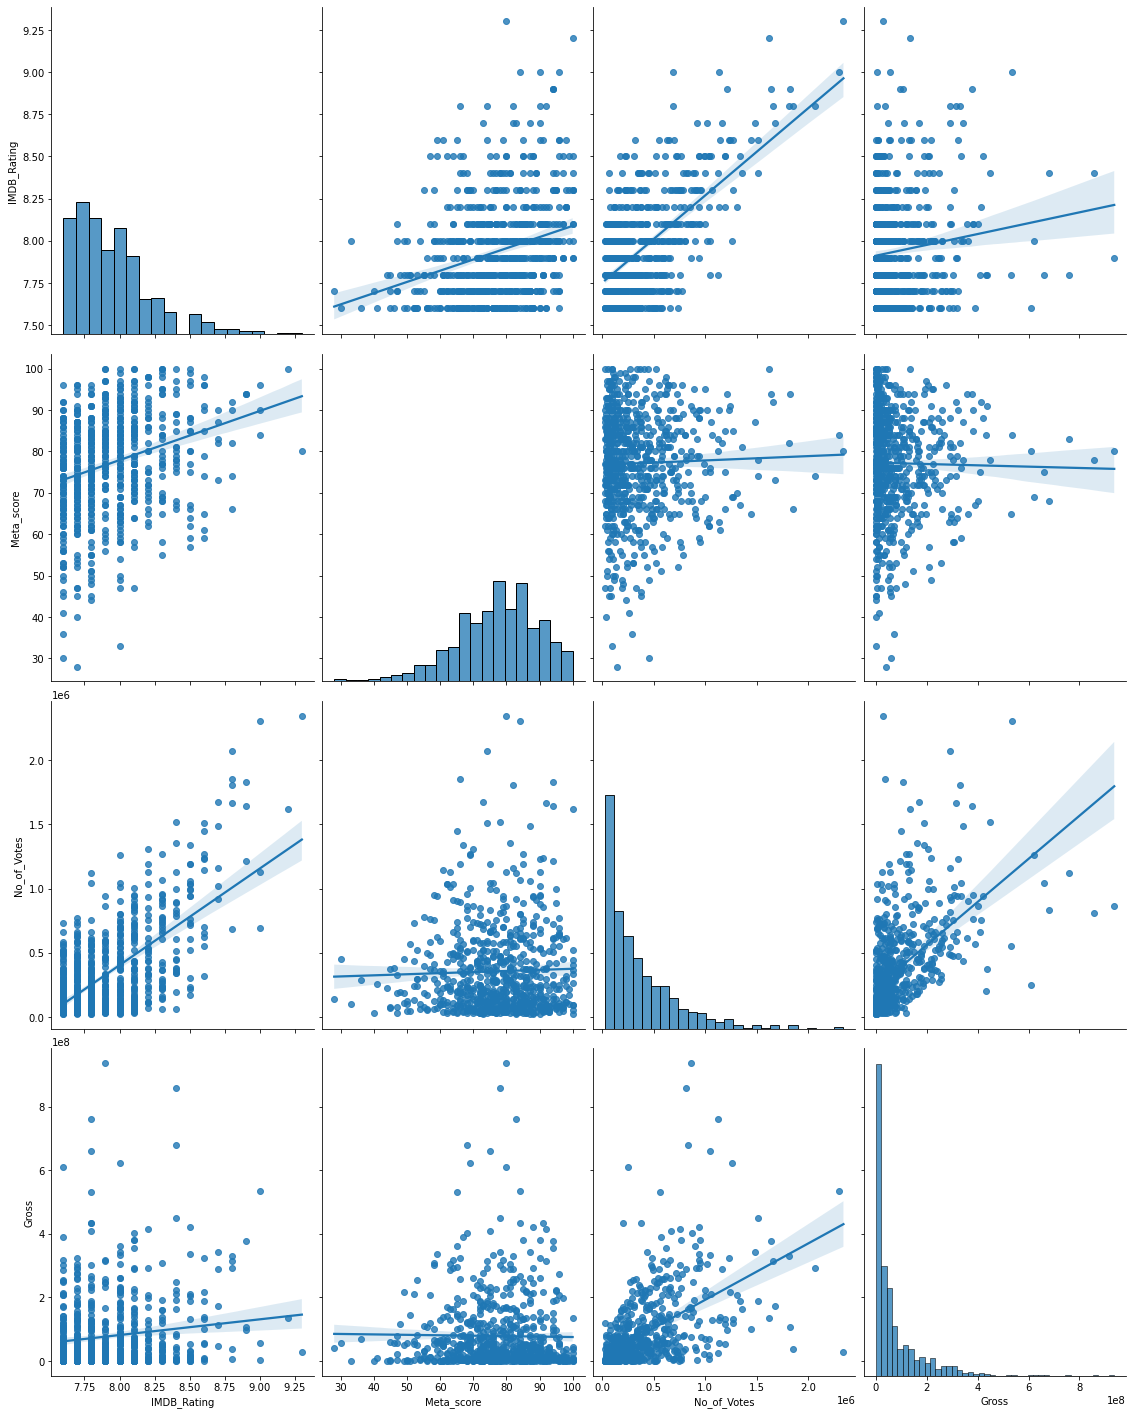

In [ ]:
plt.figure(figsize=(15, 15))

sns.pairplot(df_variaveis_numericas, kind="reg", height=5, aspect=.8)  

**Correlação entre Gross e Meta_score**: Para a visualização, escolheu-se uma tabela (matriz de correlações).

Pela tabela, percebe-se ausência de correlação entre as duas variáveis.


In [ ]:
df[["Gross", "Meta_score"]].corr()

,Gross,Meta_score
Gross,1.000000,-0.014801
Meta_score,-0.014801,1.000000
